# Project

### Github Repository : https://github.com/Bo-xuan-Wang/DSI-100-Project

# Introduction

### Background

The UBC research group led by Frank Wood is studying player behavior in a Minecraft server to optimize resource allocation and recruitment strategies. Understanding what drives players to subscribe to their newsletter is crucial for engagement and resource planning.

### Question
Can player experience level, played hours, age, and gender predict subscription to the game-related newsletter?

# Data Description

The dataset contains 200 player records with variables including experience level (Beginner to Pro), subscription status, played hours, gender, and age. Key features show a 75.5% subscription rate and average 7.23 played hours (highly skewed). Age ranges from 8-50 years, with some extreme values. Data was collected from a Minecraft server tracking gameplay and voluntary surveys. While useful for analyzing engagement patterns, limitations include skewed playtime distribution, small samples for some gender categories, and potential age outliers. These factors may affect predictive modeling accuracy but provide valuable insights into player subscription behaviors.

# Methods & Results


In [48]:
library(tidyverse)
library(tidymodels)
library(tune)

In [49]:
players <- read_csv("players.csv")
head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [53]:
players_clean <- players |>
  filter(Age >= 8 , Age <= 50) |>
  mutate(subscribe = as_factor(subscribe))
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


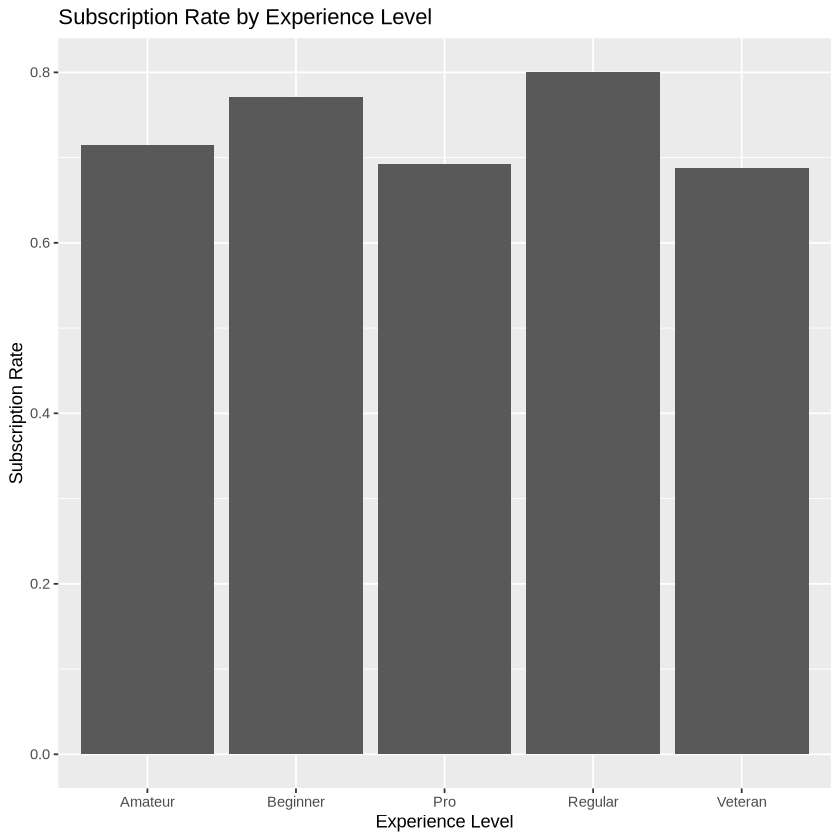

In [56]:
players_clean |>
  group_by(experience) |>
  summarize(sub_rate = mean(subscribe == "TRUE")) |>
  ggplot(aes(x = experience, y = sub_rate)) +
  geom_col() +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Subscription Rate")

In [70]:
set.seed(123)
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

In [75]:
players_recipe <- recipe(subscribe ~ experience + played_hours + age + gender, data = players_clean) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())

ERROR: [1m[33mError[39m in `recipe()`:[22m
[1m[22m[31m✖[39m Misspelled variable name or in-line functions detected.
[36mℹ[39m The following function/misspelling was found: `age`.
[36mℹ[39m Use steps to do transformations instead.
[36mℹ[39m If your modeling engine uses special terms in formulas, pass that formula to
  workflows as a model formula (`?parsnip::model_formula()`).


In [76]:
knn_spec <- logistic_reg() |>
  set_engine("kknn") |>
  set_mode("classification")

ERROR: [1m[33mError[39m in `set_engine()`:[22m
[33m![39m Engine 'kknn' is not supported for `logistic_reg()`. See `show_engines('logistic_reg')`.


In [73]:
players_wf <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec)

ERROR: Error in eval(expr, envir, enclos): object 'players_recipe' not found


In [64]:
players_fit <- fit(players_wf, data = players_train)

ERROR: Error in eval(expr, envir, enclos): object 'players_wf' not found


In [65]:
players_pred <- predict(players_fit, new_data = players_test) |>
  bind_cols(players_test)

ERROR: Error in eval(expr, envir, enclos): object 'players_fit' not found


In [ ]:
accuracy(players_pred, truth = subscribe, estimate = .pred_class)
conf_mat(players_pred, truth = subscribe, estimate = .pred_class)